# Problema do Aniversário

Quantos alunos de Processos Estocásticos são necessários para termos mais que 50% de chances de pelo menos dois alunos com a mesma data de aniversário?

## Solução:

Supomos que cada aluno pode ter nascido em qualquer dia com igual probabilidade

$P[\text{data nascimento aluno qualquer}] = 1/365$

Normalmente quando temos o termo "pelo menos" é mais fácil calcular essa probabilidade pelo seu complemento

Definimos os eventos:

$A = \{\text{pelo menos 2 alunos tem o mesmo aniversário}\} = \{\text{2 alunos ou 3 alunos ou ... tem o mesmo aniv.}\}$

$B = \{\text{nenhum aluno tem o mesmo aniv.}\}$

então 

$P[A] = 1 - P[B]$

Esse problema pode ser visto como uma urna contendo 365 bolas numeradas de 1 a 365 correspondendo a cada dia do ano. Uma bola é sorteada, seu valor anotado e colocada de volta na urna, o sorteio é repetido N vezes, número de alunos necessários, até que $P[A] \ge 0,5$, o evento $A$ seria agora pelo menos 2 bolas com o mesmo número.

Raciocinando com números pequenos, por exemplo, 4 bolas numeradas de 1 a 4 e 2 sorteios (o ano teria 4 dias e a turma dois alunos) teríamos então 

$4^2 = 16$ possibilidades 

(1,1) (1,2) (1,3) (1,4)

(2,1) (2,2) (2,3) (2,4)

(3,1) (3,2) (3,3) (3,4)

(4,1) (4,2) (4,3) (4,4)

e 

$4\times3 = 12 = (\text{AR})_4^2$ com bolas diferentes em dois sorteios, o que equivale a um sorteio e a não reposição da bola na urna.

Para 365 bolas e N sorteios

$365^N$ N-tuplas e $(\text{AR})_{365}^N$ bolas diferentes em N sorteios

Assim

$P[B] = \frac{(\text{AR})_{365}^N}{ 365^N}$  e $P[A] = 1 - P[B]$

## Cáculo de P[B]

Para N = 2 $P[B(2)] = 365\times364/365^2 = 364/365$

Para N = 3 $P[B(3)] = 365\times364\times363/365^3 = (364/365)(363/365) = P[B(2)](363/365) = P[B(2)](365 - (3-1)/365$

Para N = k $P[B(k)] = P[B(k-1)](365-k+1)/365$


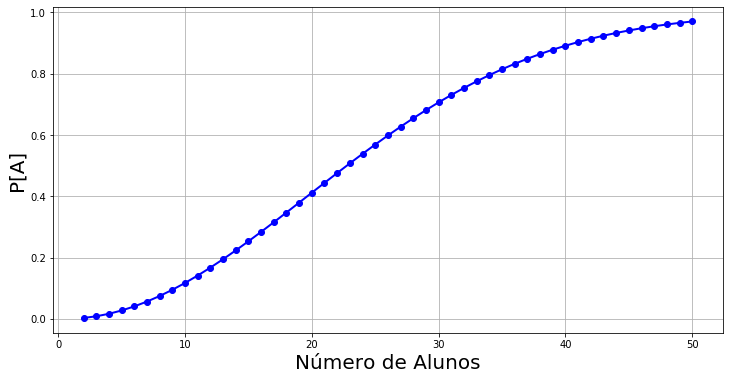

In [1]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: maio 2022
Versão: 1.0
"""

import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

N = range(2,51) # número de alunos
N_alunos = []
B = []          # nenhum aluno tem o mesmo aniv.
A = []          # pelo menos 2 alunos tem o mesmo aniversário

for i in N:
    N_alunos.append(i)
    B.append(i)
    A.append(i)

# Implementa o algoritmo: Para N = k 𝑃[𝐵(𝑘)]=𝑃[𝐵(𝑘−1)](365−𝑘+1)/365
aux = 364
for j in range(49):
    if(j == 0):
        B[j] = aux/365
        A[j] = 1 - B[j]
    else:
        aux -= 1
        B[j] = B[j-1]*aux/365
        A[j] = 1 - B[j]

plt.figure(figsize=(12,6))
plt.plot(N_alunos,A, 'o-', color="blue", linewidth=2)
plt.ylabel("P[A]", fontsize=20)
plt.xlabel("Número de Alunos", fontsize=20)
plt.grid(True)
plt.show()


